In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import csv

In [2]:
df1=pd.read_csv('data/data.csv')

In [3]:
print(df1)

      X coordinate  Y coordinate  stepratio    photoncount  label
0            248.0         210.0   0.017790      78.467175      0
1              NaN           NaN   0.485044     427.850273      0
2              NaN           NaN   1.594055    4772.488672      1
3              NaN           NaN   1.362923    7132.434662      1
4            230.0         200.0   0.760199      44.970748      0
...            ...           ...        ...            ...    ...
1072          14.0         206.0   2.287073  415017.538500      1
1073          32.0         176.0   3.266172  181726.440400      1
1074          20.0         128.0   2.729787  327272.844500      1
1075           NaN           NaN   2.045624   95373.005930      1
1076          11.0          88.0   2.513705  252119.879600      1

[1077 rows x 5 columns]


In [4]:
df2=pd.read_csv('data/data.csv', usecols=['stepratio','photoncount','label'])
print(df2)

      stepratio    photoncount  label
0      0.017790      78.467175      0
1      0.485044     427.850273      0
2      1.594055    4772.488672      1
3      1.362923    7132.434662      1
4      0.760199      44.970748      0
...         ...            ...    ...
1072   2.287073  415017.538500      1
1073   3.266172  181726.440400      1
1074   2.729787  327272.844500      1
1075   2.045624   95373.005930      1
1076   2.513705  252119.879600      1

[1077 rows x 3 columns]


Text(0, 0.5, 'Photon count')

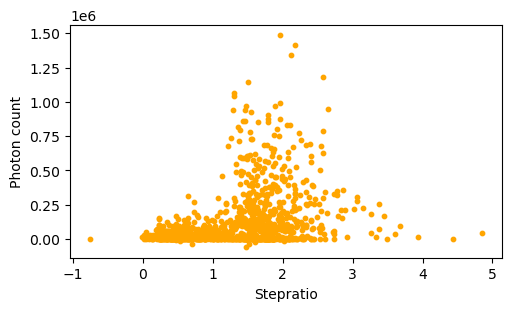

In [5]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.scatter(df2.stepratio,df2.photoncount,color='orange',s=10)
ax.set_xlabel('Stepratio')
ax.set_ylabel('Photon count')

In [6]:
with open('data/x.csv','r')as f:
    reader=csv.reader(f)
    data=list(reader)
    x=np.array(data,dtype=float)

In [7]:
with open('data/label.csv','r')as f:
    reader=csv.reader(f)
    label=list(reader)
    y=np.array(label,dtype=int)

Text(0, 0.5, 'Photon count')

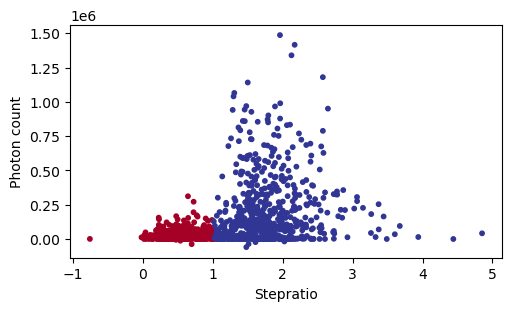

In [8]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
plt.scatter(x[:,0],x[:,1],c=y,s=10,cmap=plt.cm.RdYlBu)
ax.set_xlabel('Stepratio')
ax.set_ylabel('Photon count')

In [9]:
print(x.shape,y.shape)
print(len(x),len(y))

(1077, 2) (1077, 1)
1077 1077


In [10]:
 tf.random.set_seed(42)
 model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)])
 model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
 optimizer=tf.keras.optimizers.SGD(),
 metrics=['accuracy'])
 model_1.fit(x,y,epochs=100,verbose=0)
 model_1.evaluate(x,y)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 5.5159


[5.4039225578308105, 0.6610956192016602]

In [11]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([tf.keras.layers.Dense(1),
                            tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model_2.fit(x,y,epochs=100,verbose=0)
model_2.evaluate(x,y)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3459 - loss: 10.5420 


[10.654948234558105, 0.33890435099601746]

In [12]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model_3.fit(x,y,epochs=100,verbose=0)
model_3.evaluate(x,y)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 5.5159


[5.4039225578308105, 0.6610956192016602]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


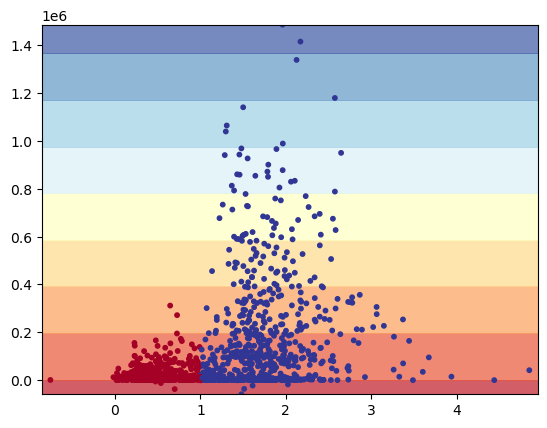

In [13]:
def plot_decision_boundary(model, x, y):
    
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
     print("doing multiclass classification...")
     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
     print("doing binary classifcation...")
     y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=10, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

plot_decision_boundary(model_3, x, y)  
  

In [17]:
x_train, y_train = x[:950], y[:950]
x_test, y_test = x[950:], y[950:]
x_train.shape, x_test.shape

((950, 2), (127, 2))

In [19]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy,

                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),

                metrics = ['accuracy'])

model_4.fit(x_train, y_train, epochs = 1000, verbose = 0)
loss, accuracy = model_4.evaluate(x_test, y_test)
print(f' Model loss on the test set: {loss}')
print(f' Model accuracy on the test set: {100*accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9122 - loss: 0.5032  
 Model loss on the test set: 0.5102129578590393
 Model accuracy on the test set: 89.76377844810486


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classifcation...


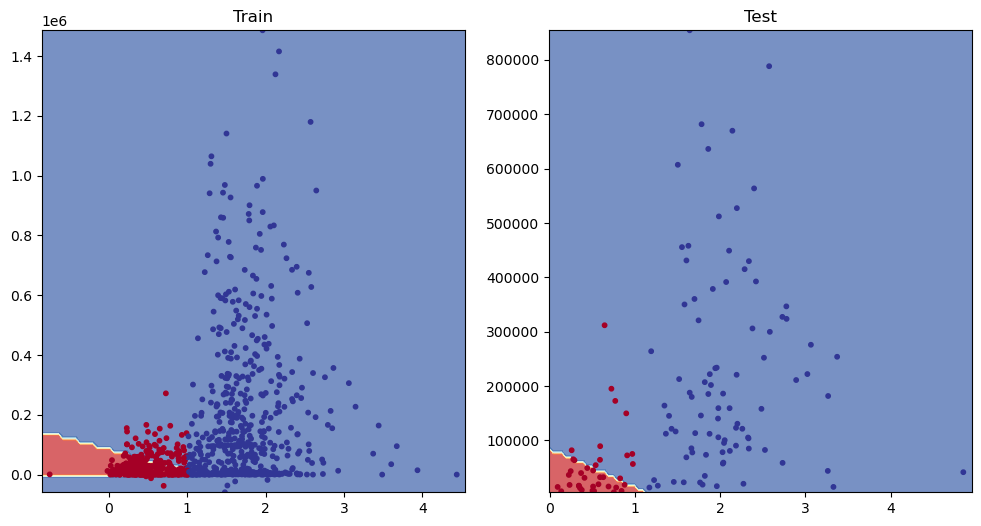

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, x=x_test, y=y_test)
plt.show()